In [78]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [85]:
top_dir = "csvs/"
csvs = [os.path.join(top_dir, csv) for csv in sorted(list(os.listdir(top_dir))) if "ablations" not in csv]
for i,csv in enumerate(csvs):
    print(i,csv)

0 csvs/.ipynb_checkpoints
1 csvs/attn_patch_emd.csv
2 csvs/attn_patch_emd_individuated_layer.csv
3 csvs/attn_patch_emd_individuated_layer_pos.csv
4 csvs/cl_das_divergences.csv
5 csvs/cl_das_divergences_20251117_201206.csv
6 csvs/cl_das_divergences_dorotFalse_20251118_011037.csv
7 csvs/cl_das_divergences_dorotFalse_20251118_095858.csv
8 csvs/cl_das_divergences_dorotFalse_20251118_133356.csv
9 csvs/cl_das_divergences_dorotFalse_20251118_180253.csv
10 csvs/cl_das_divergences_dorotFalse_20251118_192921.csv
11 csvs/cl_das_divergences_dorotFalse_20251119_211810.csv
12 csvs/cl_das_divergences_dorotFalse_20251119_211825.csv
13 csvs/cl_hyperparameter_search_used_in_paper.csv
14 csvs/das_emd.csv
15 csvs/das_emd_cleps0.csv
16 csvs/indy_attn_patch_emd.csv
17 csvs/mean_diff_all_layers_and_pos.csv
18 csvs/mean_diff_emd.csv
19 csvs/mean_diff_individuated_layers_all_pos.csv
20 csvs/sae_emd.csv


In [86]:
idxs = [0,1,2]
csvs = [
    "csvs/das_emd_cleps0.csv",
    "csvs/mean_diff_emd.csv",
    "csvs/sae_emd.csv",
]

In [87]:
dfs = []
for idx in idxs:
    df = pd.read_csv(csvs[idx])
    dfs.append(df)
emd_df = pd.concat(dfs)
emd_df

,sample_id,mse,emd,cost_cos,base_emd,base_cost_cos,method,pos,layer,diff_emd,perc_emd,frac_emd,diff_cost_cos,perc_cost_cos,frac_cost_cos
0,0,0.020643,31.257477,0.021354,6.942384,0.004786,das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.020643,31.500534,0.021676,7.232845,0.005233,das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.020643,31.020809,0.021463,7.044073,0.004739,das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.020643,31.365515,0.021895,7.394894,0.004810,das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.020643,31.416084,0.022182,6.968050,0.004675,das,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0.047692,32.674843,0.380977,25.254208,0.304190,sae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.047796,32.690285,0.380400,25.467682,0.306439,sae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.047349,32.305138,0.379801,25.696590,0.305395,sae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.047745,32.675140,0.382484,25.239330,0.301438,sae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
emd_df.loc[emd_df["layer"].isna(), "layer"] = 0

In [89]:
all_cols = []
for col in ["emd", "cost_cos"]:
    if col not in emd_df.columns: continue
    base = "base_"+col
    diff = "diff_"+col
    perc = "perc_"+col
    frac = "frac_"+col
    emd_df[diff] = emd_df[col]-emd_df[base]
    emd_df[perc] = emd_df[diff]/emd_df[base]
    emd_df[frac] = emd_df[col]/emd_df[base]
    all_cols.append(col)
    all_cols.append(base)
    all_cols.append(diff)
    all_cols.append(perc)
    all_cols.append(frac)
emd_df.groupby(["method","layer"])[all_cols].mean()

emd   base_emd   diff_emd  perc_emd  frac_emd  \
method    layer                                                        
das       0.0    31.312084   7.116449  24.195635  3.402307  4.402307   
mean_diff 0.0     4.591966   4.192843   0.399123  0.105223  1.105223   
          1.0     3.812425   2.939645   0.872780  0.299887  1.299887   
          2.0     4.715240   3.533781   1.181459  0.349472  1.349472   
          3.0     7.106244   4.385388   2.720856  0.641495  1.641495   
          4.0     7.559691   4.874285   2.685406  0.557537  1.557537   
          5.0     8.242039   4.710367   3.531673  0.758232  1.758232   
          6.0     8.653488   4.446402   4.207085  0.968925  1.968925   
          7.0     9.492608   4.551070   4.941538  1.089558  2.089558   
          8.0    10.026150   4.874963   5.151187  1.067706  2.067706   
          9.0     9.869238   4.401892   5.467346  1.244137  2.244137   
          10.0    9.643649   4.147340   5.496309  1.332216  2.332216   
          11.0    9.562362   3.915384   5.646978  1.458693  2.458693   
          12.0    9.426382   4.142259   5.284124  1.280894  2.280894   
          13.0    8.772761   3.713942   5.058819  1.365247  2.365247   
          14.0    8.246433   3.776017   4.470416  1.185230  2.185230   
          15.0    7.414255   3.927814   3.486440  0.905466  1.905466   
          16.0    7.158546   3.815857   3.342689  0.883588  1.883588   
          17.0    6.638800   3.805436   2.833364  0.758354  1.758354   
          18.0    6.298848   3.535647   2.763200  0.792201  1.792201   
          19.0    7.151521   3.807752   3.343769  0.886075  1.886075   
          20.0    6.616122   3.636378   2.979744  0.819840  1.819840   
          21.0    7.226456   3.768078   3.458378  0.937978  1.937978   
          22.0    6.921887   3.846857   3.075030  0.844830  1.844830   
          23.0    7.257673   3.556140   3.701533  1.050552  2.050552   
          24.0    9.139471   4.296636   4.842835  1.130444  2.130444   
          25.0    9.324889   4.431587   4.893302  1.115097  2.115097   
          26.0    9.562852   4.424960   5.137893  1.164850  2.164850   
          27.0   10.346960   4.716321   5.630639  1.214316  2.214316   
          28.0   10.278802   4.618607   5.660196  1.227310  2.227310   
          29.0   10.548550   4.649855   5.898695  1.270889  2.270889   
          30.0   10.669852   4.664568   6.005284  1.313859  2.313859   
          31.0   10.434286   4.567068   5.867218  1.302638  2.302638   
sae       0.0    32.588028  25.342810   7.245218  0.286017  1.286017   

                 cost_cos  base_cost_cos  diff_cost_cos  perc_cost_cos  \
method    layer                                                          
das       0.0    0.021714       0.004849       0.016865       3.485998   
mean_diff 0.0    0.086387       0.087524      -0.001137      -0.013085   
          1.0    0.080909       0.085520      -0.004612      -0.043498   
          2.0    0.093583       0.075331       0.018251       0.254098   
          3.0    0.100430       0.079722       0.020708       0.267322   
          4.0    0.093270       0.079133       0.014137       0.186006   
          5.0    0.085937       0.065178       0.020758       0.321284   
          6.0    0.085886       0.061320       0.024566       0.422199   
          7.0    0.078815       0.052362       0.026453       0.510605   
          8.0    0.080093       0.057541       0.022552       0.395073   
          9.0    0.076295       0.053336       0.022959       0.446053   
          10.0   0.078245       0.048781       0.029464       0.631661   
          11.0   0.075166       0.045129       0.030037       0.677383   
          12.0   0.068784       0.049011       0.019773       0.416102   
          13.0   0.066869       0.043332       0.023537       0.549294   
          14.0   0.074210       0.052555       0.021655       0.439750   
          15.0   0.063772       0.049203       0.014568       0.319139   
          16.0   0.07571

In [91]:
drop_methods = {"indy attn patch"}

In [93]:
choice_col = "perc_emd"
dupl_cols = ["method", "sample_id"]
demd_df = emd_df.loc[~emd_df["method"].isin(drop_methods)]
demd_df["layer_mean"] = emd_df.groupby(["method","layer"])[choice_col].transform("mean")
demd_df = demd_df.sort_values(by="layer_mean", ascending=False)\
    .drop_duplicates(dupl_cols)
demd_df

,sample_id,mse,emd,cost_cos,base_emd,base_cost_cos,method,pos,layer,diff_emd,perc_emd,frac_emd,diff_cost_cos,perc_cost_cos,frac_cost_cos,layer_mean
0,0,0.020643,31.257477,0.021354,6.942384,0.004786,das,NaN,0.0,24.315093,3.502412,4.502412,0.016568,3.461551,4.461551,3.402307
1,1,0.020643,31.500534,0.021676,7.232845,0.005233,das,NaN,0.0,24.267689,3.355207,4.355207,0.016444,3.142379,4.142379,3.402307
2,2,0.020643,31.020809,0.021463,7.044073,0.004739,das,NaN,0.0,23.976737,3.403817,4.403817,0.016724,3.529131,4.529131,3.402307
3,3,0.020643,31.365515,0.021895,7.394894,0.004810,das,NaN,0.0,23.970621,3.241510,4.241510,0.017085,3.551970,4.551970,3.402307
4,4,0.020643,31.416084,0.022182,6.968050,0.004675,das,NaN,0.0,24.448035,3.508591,4.508591,0.017507,3.744961,4.744961,3.402307
56,1,0.006719,9.242398,0.074263,4.111889,0.040630,mean_diff,NaN,11.0,5.130509,1.247726,2.247726,0.033633,0.827788,1.827788,1.458693
59,4,0.006719,9.768898,0.072451,3.654134,0.048487,mean_diff,NaN,11.0,6.114764,1.673383,2.673383,0.023964,0.494236,1.494236,1.458693
55,0,0.006719,9.399160,0.075500,4.209976,0.049527,mean_diff,NaN,11.0,5.189184,1.232592,2.232592,0.025974,0.524444,1.524444,1.458693
58,3,0.006719,9.727415,0.080510,4.118266,0.042103,mean_diff,NaN,11.0,5.609149,1.362017,2.362017,0.038407,0.912219,1.912219,1.458693
57,2,0.006719,9.673937,0.073105,3.482655,0.044899,mean_diff,NaN,11.0,6.191282,1.777748,2.777748,0.028207,0.628226,1.628226,1.458693


In [94]:
set(demd_df["method"])

{'das', 'mean_diff', 'sae'}

In [95]:
names = {
    "das": "DAS",
    "sae": "SAE",
    "mean_diff": "Mean Diff",
}
ordering = {
    "mean_diff": 0,
    "sae": 1,
    "das": 2,
}

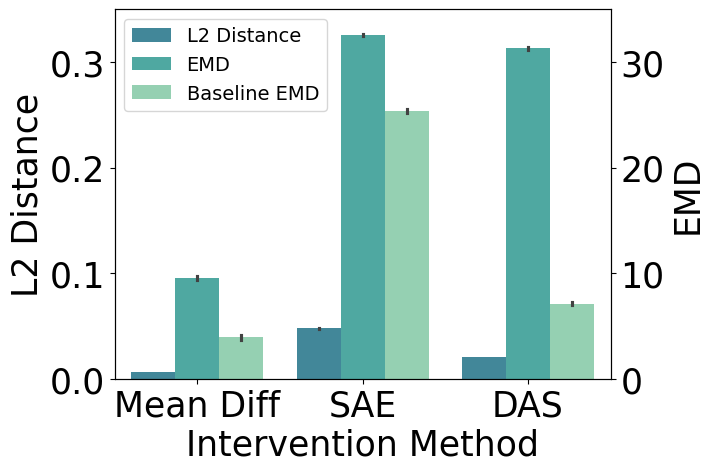

In [123]:
fontsize=25
titlesize=30
legendsize=14
ticksize=25
labelsize=25

fig = plt.figure()
palette = [p for i,p in enumerate(sns.color_palette("mako")) if i>2]
demd_df["xlabel"] = demd_df.apply(lambda x: names[x.method], axis=1)
demd_df["sort_order"] = demd_df.apply(lambda x: ordering[x.method], axis=1)
demd_df = demd_df.sort_values(by="sort_order")
mse_scale = 100
demd_df["scaled_mse"] = demd_df["mse"]*mse_scale
mname = "Divergence\nMeasure"
plot_df = pd.melt(
    demd_df,
    id_vars=["sample_id", "method", "xlabel", "sort_order"],
    value_vars=["scaled_mse", "emd", "base_emd"],
    var_name=mname,
    value_name="distance",
)
name_map = {
    "scaled_mse": "L2 Distance",
    "emd": "EMD",
    "base_emd": "Baseline EMD",
}
plot_df[mname] = plot_df.apply(lambda x: name_map[x[mname]], axis=1)
sns.barplot(x="xlabel", y="distance", hue=mname, palette=palette, data=plot_df)

plt.xticks(fontsize=ticksize)
plt.ylabel("L2 Distance", fontsize=labelsize)
yticks = [0,10,20,30]
ylim = [0,35]
plt.yticks(yticks, [y/mse_scale for y in yticks], fontsize=ticksize)
plt.ylim(ylim)

plt.xlabel("Intervention Method", fontsize=labelsize)
plt.legend(title="", fontsize=legendsize)

ax = plt.gca()
ax2 = ax.twinx()
plt.sca(ax2)
plt.yticks(yticks, fontsize=ticksize)
plt.ylim(ylim)
plt.ylabel("EMD", fontsize=labelsize)


plt.savefig("figs/divergence_fig.png", dpi=600, bbox_inches="tight")
plt.show()

In [24]:
agg_df = emd_df.groupby(["method"])[["emd","base_emd"]].mean().reset_index()
agg_df["ratio"] = agg_df["emd"]/agg_df["base_emd"]
agg_df["percent"] = (agg_df["emd"]-agg_df["base_emd"])/agg_df["base_emd"]

SyntaxError: incomplete input (4291586243.py, line 4)

# Boundless DAS CL Experiment

In [135]:
top_dir = "csvs/"
csvs = [os.path.join(top_dir, csv) for csv in sorted(list(os.listdir(top_dir))) if "ablations" not in csv]
for i,csv in enumerate(csvs):
    print(i,csv)

0 csvs/.ipynb_checkpoints
1 csvs/attn_patch_emd.csv
2 csvs/attn_patch_emd_individuated_layer.csv
3 csvs/attn_patch_emd_individuated_layer_pos.csv
4 csvs/cl_das_divergences.csv
5 csvs/cl_das_divergences_20251117_201206.csv
6 csvs/cl_das_divergences_dorotFalse_20251118_011037.csv
7 csvs/cl_das_divergences_dorotFalse_20251118_095858.csv
8 csvs/cl_das_divergences_dorotFalse_20251118_133356.csv
9 csvs/cl_das_divergences_dorotFalse_20251118_180253.csv
10 csvs/cl_das_divergences_dorotFalse_20251118_192921.csv
11 csvs/cl_das_divergences_dorotFalse_20251119_211810.csv
12 csvs/cl_das_divergences_dorotFalse_20251119_211825.csv
13 csvs/cl_hyperparameter_search_used_in_paper.csv
14 csvs/das_emd.csv
15 csvs/das_emd_cleps0.csv
16 csvs/indy_attn_patch_emd.csv
17 csvs/mean_diff_all_layers_and_pos.csv
18 csvs/mean_diff_emd.csv
19 csvs/mean_diff_individuated_layers_all_pos.csv
20 csvs/sae_emd.csv


In [150]:
idxs = [0,1]
csvs = [
    "cl_boundless_das_results1.csv",
    "cl_boundless_das_results2.csv",
]

In [151]:
dfs = []
for idx in idxs:
    df = pd.read_csv(csvs[idx])
    dfs.append(df)
cl_df = pd.concat(dfs)
cl_df

,seed,method,cl_eps,train_accuracy,test_accuracy,train_cl_loss,train_actn_loss,test_cl_loss,test_actn_loss,mse,mse_sem,emd,emd_sem,cost_cos,cost_cos_sem,base_emd,base_emd_sem,base_cost_cos,base_cost_cos_sem
0,12387,das,4.0,0.96156,0.96,0.029661,0.367899,0.032198,0.366552,0.014551,3.484690e-10,24.299830,0.120046,0.016783,0.000100,6.884838,0.058345,0.004604,0.000055
1,12387,das,3.0,0.96392,0.95,0.031842,0.360819,0.034303,0.355042,0.015501,1.862645e-10,25.380259,0.125045,0.017599,0.000106,6.884838,0.058345,0.004604,0.000055
2,12387,das,2.0,0.96432,0.96,0.034870,0.355938,0.036168,0.345738,0.016346,4.562530e-10,26.384660,0.129596,0.018300,0.000104,6.884838,0.058345,0.004604,0.000055
3,12387,das,1.0,0.96624,0.96,0.039269,0.350701,0.040923,0.341364,0.018500,8.330002e-10,29.108624,0.139331,0.020170,0.000112,6.884838,0.058345,0.004604,0.000055
4,12387,das,0.5,0.96640,0.96,0.041970,0.348966,0.043624,0.338365,0.019724,3.725290e-10,30.419588,0.135556,0.021063,0.000117,6.884838,0.058345,0.004604,0.000055
5,12387,das,0.0,0.96652,0.96,0.044837,0.348112,0.046465,0.340668,0.021008,7.450581e-10,31.578656,0.130520,0.021870,0.000123,6.884838,0.058345,0.004604,0.000055
6,24732,das,4.0,0.96072,0.97,0.029530,0.368014,0.031335,0.346349,0.014165,2.281265e-10,24.077819,0.115858,0.016795,0.000093,6.857449,0.089045,0.004763,0.000158
7,24732,das,3.0,0.96280,0.97,0.031729,0.362369,0.033899,0.356898,0.015325,3.725290e-10,25.721202,0.113526,0.017929,0.000078,6.857449,0.089045,0.004763,0.000158
8,24732,das,2.0,0.96404,0.96,0.034690,0.356058,0.036506,0.335835,0.016506,4.562530e-10,27.049034,0.110526,0.018895,0.000065,6.857449,0.089045,0.004763,0.000158
9,24732,das,1.0,0.96720,0.96,0.038941,0.352547,0.040975,0.337594,0.018530,4.562530e-10,29.477180,0.102800,0.020560,0.000055,6.857449,0.089045,0.004763,0.000158


In [152]:
cl_df["emd_diff"] = cl_df["emd"]-cl_df["base_emd"]

In [153]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

/tmp/ipykernel_894227/3365075985.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,max(plot_df["cl_eps"].unique())])


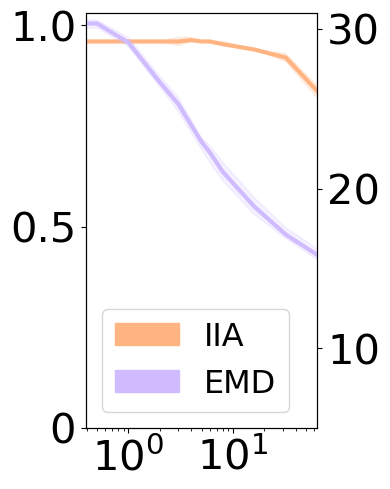

In [154]:
ticksize = 30
linewidth = 3
acc_color = sns.color_palette("pastel")[1]
cl_color = sns.color_palette("pastel")[4]
base_color = sns.color_palette("pastel")[0]
valid_cls = None # [float(x) for x in cl_df["cl_eps"].unique() if x<16]

plot_df = cl_df.copy()
if valid_cls is not None and len(valid_cls)>0:
    plot_df = plot_df.loc[plot_df["cl_eps"].isin(valid_cls)]

fig = plt.figure(figsize=(4,5))
ax = plt.gca()
sns.lineplot(
    x="cl_eps",
    y="test_accuracy",
    color=acc_color,
    data=plot_df,
    ax=ax,
    linewidth=linewidth,
)

plt.ylabel("")
plt.xlabel("")

plt.yticks([0,0.5,1.0], ["0","0.5","1.0"], fontsize=ticksize)
plt.ylim([0,1.03])
plt.xticks(fontsize=ticksize)
ax.set_xscale("log")
plt.xlim([0,max(plot_df["cl_eps"].unique())])

ax2 = ax.twinx()
plt.sca(ax2)
sns.lineplot(
    x="cl_eps",
    y="emd",
    color=cl_color,
    data=plot_df,
    ax=ax2,
    linewidth=linewidth,
)
#sns.lineplot(
#    x="cl_eps",
#    y="base_emd",
#    color=base_color,
#    data=plot_df,
#    ax=ax2,
#    linewidth=linewidth,
#)
plt.ylabel("")
plt.xlabel("")
plt.yticks([10,20,30], fontsize=ticksize)
plt.ylim([5,31])
plt.xticks(fontsize=ticksize)

acc_patch = mpatches.Patch(color=acc_color, label="IIA")
emd_patch = mpatches.Patch(color=cl_color, label="EMD")
plt.legend(handles=[acc_patch,emd_patch], fontsize=23, loc="lower left")

plt.tight_layout()
plt.savefig(f"figs/cl_eps_boundless_das.png", bbox_inches="tight", dpi=600)
plt.show()

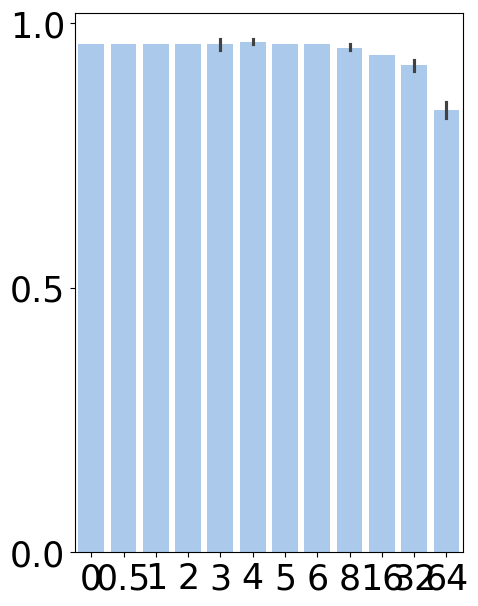

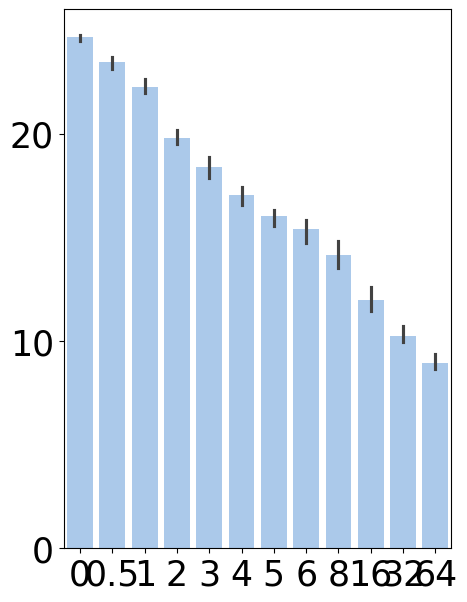

In [156]:
ticksize = 25
color = sns.color_palette("pastel")[0]
valid_cls = None

fig = plt.figure(figsize=(5,7))
sns.barplot(
    x="cl_eps",
    y="test_accuracy",
    color=color,
    data=cl_df
)

plt.ylabel("")
plt.xlabel("")

plt.yticks([0,0.5,1.0], fontsize=ticksize)
xvals = [x for x in range(len(cl_df["cl_eps"].unique()))]
xticks = [str(x) for x in sorted(list(cl_df["cl_eps"].unique()))]
xticks = [x if "0"==x[0] and x!="0.0" else x.split(".")[0] for x in xticks]
plt.xticks(xvals, xticks, fontsize=ticksize)
plt.show()

fig = plt.figure(figsize=(5,7))
sns.barplot(
    x="cl_eps",
    y="emd_diff",
    color=color,
    data=cl_df,
)
plt.ylabel("")
plt.xlabel("")
plt.yticks([20,10,0], fontsize=ticksize)
xvals = [x for x in range(len(cl_df["cl_eps"].unique()))]
xticks = [str(x) for x in sorted(list(cl_df["cl_eps"].unique()))]
xticks = [x if "0"==x[0] and x!="0.0" else x.split(".")[0] for x in xticks]
plt.xticks(xvals, xticks, fontsize=ticksize)
plt.show()